# Advanced Machine Learning. Домашнее задание 3

Data: https://www.dropbox.com/s/s4qj0fpsn378m2i/chgk.zip

(Downloaded from: https://rating.chgk.info/)

### Задание 1

Прочитайте и проанализируйте данные, выберите турниры, в которых есть данные
о составах команд и повопросных результатах (поле mask в results.pkl). Для
унификации предлагаю:
* взять в тренировочный набор турниры с dateStart из 2019 года;
* в тестовый — турниры с dateStart из 2020 года.

In [1]:
prepared = True

In [2]:
import json, pickle


def is_invalid(dct, key):
    return key not in dct or dct[key] is None


def check_data(tournament, result, data_type):
    if data_type == 'train' and not tournament['dateStart'][:4] == '2019':
            return False
    
    if data_type == 'test' and not tournament['dateStart'][:4] == '2020':
        return False
    
    # remove tournaments without results, result mask or teamMembers
    questions_cnt = 0
    for q in tournament['questionQty'].values():
        questions_cnt += q
    
    if not len(result):
        return False
    
    for team in result:
        if is_invalid(team, 'mask'):
            return False
        if len(team['mask']) != questions_cnt:
            return False
        if is_invalid(team, 'teamMembers'):
            return False
        
    return True


def get_players(tournaments, players):
    train_players = set()
    for key in tournaments.keys():
        for team in results[key]:
            for player in team['teamMembers']:
                train_players.add(player['player']['id'])
    
    return {k: v for k, v in players.items() if k in train_players}


if not prepared:
    tournaments = pickle.load(open('chgk/tournaments.pkl', 'rb'))
    results = pickle.load(open('chgk/results.pkl', 'rb'))
    players = pickle.load(open('chgk/players.pkl', 'rb'))
    
    tournaments_train = {k: v for k, v in tournaments.items() if check_data(v, results[k], 'train')}
    pickle.dump(tournaments_train, open('chgk/tournaments_train.pkl', 'wb'))
    
    prepared_players = get_players(tournaments_train, players)
    pickle.dump(prepared_players, open('chgk/prepared_players.pkl', 'wb'))
    
    tournaments_test = {k: v for k, v in tournaments.items() if check_data(v, results[k], 'test')}
    pickle.dump(tournaments_test, open('chgk/tournaments_test.pkl', 'wb'))
    
    results_train = {key: results[key] for key in tournaments_train.keys()}
    pickle.dump(results_train, open('chgk/results_train.pkl', 'wb'))
    
    results_test = {key: results[key] for key in tournaments_test.keys()}
    pickle.dump(results_test, open('chgk/results_test.pkl', 'wb'))
    
else:
    tournaments_train = pickle.load(open('chgk/tournaments_train.pkl', 'rb'))
    tournaments_test = pickle.load(open('chgk/tournaments_test.pkl', 'rb'))
    results_train = pickle.load(open('chgk/results_train.pkl', 'rb'))
    results_test = pickle.load(open('chgk/results_test.pkl', 'rb'))
    prepared_players = pickle.load(open('chgk/prepared_players.pkl', 'rb'))

In [3]:
len(tournaments_train), len(tournaments_test)

(660, 164)

In [4]:
len(results_train), len(results_test)

(660, 164)

In [5]:
tournaments_train[5010]

{'id': 5010,
 'name': 'Школьный Синхрон-lite. Выпуск 2.4',
 'dateStart': '2019-03-01T12:00:00+03:00',
 'dateEnd': '2019-03-31T23:55:00+03:00',
 'type': {'id': 8, 'name': 'Асинхрон'},
 'season': '/seasons/52',
 'orgcommittee': [{'id': 23740,
   'name': 'Владимир',
   'patronymic': 'Сергеевич',
   'surname': 'Островский'}],
 'synchData': {'dateRequestsAllowedTo': '2019-03-29T23:59:59+03:00',
  'resultFixesTo': '2019-04-13T23:59:59+03:00',
  'resultsRecapsTo': '2019-04-07T23:59:59+03:00',
  'allowAppealCancel': True,
  'allowNarratorErrorAppeal': False,
  'dateArchivedAt': '2019-04-18T23:59:59+03:00',
  'dateDownloadQuestionsFrom': '2019-02-28T00:00:00+03:00',
  'dateDownloadQuestionsTo': '2019-03-31T12:00:00+03:00',
  'hideQuestionsTo': '2019-04-01T23:59:59+03:00',
  'hideResultsTo': '2019-03-31T23:59:59+03:00',
  'allVerdictsDone': None,
  'instantControversial': False},
 'questionQty': {'1': 12, '2': 12, '3': 12}}

In [6]:
results_train[5010]

[{'team': {'id': 61439,
   'name': 'Эстетика победы',
   'town': {'id': 11, 'name': 'Архангельск'}},
  'mask': '111101111111101100111011011111101111',
  'current': {'name': 'Эстетика победы',
   'town': {'id': 11, 'name': 'Архангельск'}},
  'questionsTotal': 29,
  'synchRequest': {'id': 59637, 'venue': {'id': 3146, 'name': 'Архангельск'}},
  'position': 1,
  'controversials': [{'id': 95391,
    'questionNumber': 11,
    'answer': 'копья',
    'issuedAt': '2019-03-04T12:10:47+03:00',
    'status': 'A',
    'comment': None,
    'resolvedAt': '2019-04-05T13:06:41+03:00',
    'appealJuryComment': None},
   {'id': 96149,
    'questionNumber': 17,
    'answer': 'петух',
    'issuedAt': '2019-03-13T17:04:41+03:00',
    'status': 'D',
    'comment': None,
    'resolvedAt': '2019-04-05T20:35:48+03:00',
    'appealJuryComment': None}],
  'flags': [{'id': 3, 'shortName': 'Ш', 'longName': 'Школьная команда'}],
  'teamMembers': [{'flag': 'Б',
    'usedRating': 2234,
    'rating': 2234,
    'player'

In [7]:
def print_dict(dct, n):
    for i, (k, v) in enumerate(dct.items()):
        if i > n:
            break
        print(k, v)

In [8]:
print_dict(prepared_players, 5)

15 {'id': 15, 'name': 'Олег', 'patronymic': 'Игоревич', 'surname': 'Абарников'}
16 {'id': 16, 'name': 'Азер', 'patronymic': 'Абасали оглы', 'surname': 'Абасалиев'}
23 {'id': 23, 'name': 'Андрей', 'patronymic': 'Николаевич', 'surname': 'Абащенко'}
31 {'id': 31, 'name': 'Ситара', 'patronymic': 'Фахраддин гызы', 'surname': 'Абасова'}
35 {'id': 35, 'name': 'Нарек', 'patronymic': 'Гагикович', 'surname': 'Абгарян'}
38 {'id': 38, 'name': 'Эдуард', 'patronymic': '', 'surname': 'Абдеев'}


### Задание 2

Постройте baseline-модель на основе линейной или логистической регрессии,
которая будет обучать рейтинг-лист игроков. Замечания и подсказки:
* повопросные результаты — это фактически результаты броска монетки, и их
предсказание скорее всего имеет отношение к бинарной классификации;
* в разных турнирах вопросы совсем разного уровня сложности, поэтому
модель должна это учитывать; скорее всего, модель должна будет явно
обучать не только силу каждого игрока, но и сложность каждого вопроса;
* для baseline-модели можно забыть о командах и считать, что повопросные
результаты команды просто относятся к каждому из её игроков.

Пусть $P(X)$ $-$ рейтиг игрока $X$ (вероятность ответить на какой-то вопрос).

$P(X)=\int_Q P(X, Q=q) dq = \int_Q P(X|Q=q)P(q)dq$, где $Q$ $-$ случайная величина, характеристика сложности вопроса.
Оценим $q$ $-$ сложность вопроса, как вероятность ответа на него игроками в рамках заданного турнира. В предположении, что повопросные результаты команды относятся к каждому из ее игроков, мы получим
$$P(Q=q) = \frac{m_{ответили}}{n_{участвовали}}.$$

$P(Q=q)$ оценим на train_set, $P(X|Q=q)$ - обучим для каждого игрока.

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
def get_questions_rating(results):
    questions_rating = {'q_id': [], 'rating': []}
    for t_id, result in results.items():
        cur_rating = [0] * len(result[0]['mask'])
        for team in result:
            for pos in range(len(team['mask'])):
                cur_rating[pos] += 1 if team['mask'][pos] == '1' else 0
        cur_rating = np.array(cur_rating) / len(result)
        for i in range(len(cur_rating)):
            questions_rating['q_id'].append(t_id * 1000 + i)
            questions_rating['rating'].append(cur_rating[i])
            
    return pd.DataFrame(questions_rating['rating'], columns=['rating'], index=questions_rating['q_id'])

In [11]:
questions_rating_train = get_questions_rating(results_train)
questions_rating_test = get_questions_rating(results_test)

In [12]:
len(questions_rating_train), len(questions_rating_test)

(30716, 7299)

In [13]:
questions_rating_train

,rating
4772000,0.883117
4772001,0.779221
4772002,0.445887
4772003,0.519481
4772004,0.878788
...,...
6191031,0.000000
6191032,0.136364
6191033,0.818182
6191034,0.136364


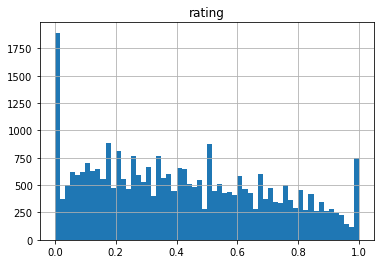

In [14]:
_ = questions_rating_train.hist(bins=60)

In [15]:
class QDistr:
    def __init__(self, x, bins):
        x = np.sort(x)
        
        self.__set_bound_points(x, bins)
        self.__set_points()
        self.delta = (x[-1] - x[0]) / bins
        self.__set_weights(x, bins)
        
    def __set_bound_points(self, x, bins):
        self.bound_points = np.linspace(0, 1, bins + 1)
        
    def __set_points(self):
        self.points = (self.bound_points[:-1] + self.bound_points[1:]) / 2

    def __set_weights(self, x, bins):
        weights = []
        for i in range(1, bins + 1):
            weights.append(((x >= self.bound_points[i - 1]) & (x < self.bound_points[i])).sum() / len(x))
        weights[-1] += (x == self.bound_points[-1]).sum() / len(x)
        self.weights = np.array(weights)
    
    def pdf(self, x):
        return self.weights[np.where(self.points <= x)[0][-1]]
            
    def plot_pdf(self):
        plt.plot(self.points, self.weights)

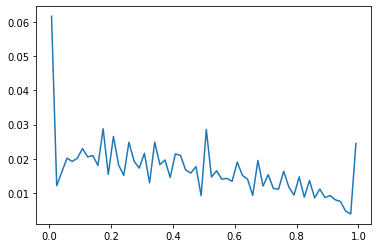

In [16]:
Q = QDistr(questions_rating_train.rating.values, 60)
Q.plot_pdf()

In [17]:
def get_players_questions(results, questions):
    players_questions = {
        'question_id': [],
        'team_id': [],
        'player_id': [],
        'question_rating': [],
        'answer': [],
    }
    
    for t_id, result in results.items():
        for team in result:
            for i, ans in enumerate(team['mask']):                    
                q_id = t_id * 1000 + i
                rating = questions.rating[q_id]
                team_id = t_id * 10 ** 7 + team['team']['id']
                if ans == '1':
                    ans = 1
                else:
                    ans = 0
                
                for player in team['teamMembers']:
                    players_questions['question_id'].append(q_id)
                    players_questions['team_id'].append(team_id)
                    players_questions['player_id'].append(player['player']['id'])
                    players_questions['question_rating'].append(rating)
                    players_questions['answer'].append(ans)
                
    return pd.DataFrame(players_questions)

In [18]:
preprocessed = True

In [19]:
if not preprocessed:
    players_questions_train = get_players_questions(results_train, questions_rating_train)
    players_questions_train.to_csv('chgk/players_questions.csv', index=False)

else:
    players_questions_train = pd.read_csv('chgk/players_questions.csv')

In [20]:
players_questions_train

,question_id,team_id,player_id,question_rating,answer
0,4772000,47720045556,6212,0.883117,1
1,4772000,47720045556,18332,0.883117,1
2,4772000,47720045556,18036,0.883117,1
3,4772000,47720045556,22799,0.883117,1
4,4772000,47720045556,15456,0.883117,1
...,...,...,...,...,...
16215174,6191035,61910076301,217855,0.227273,0
16215175,6191035,61910076301,217856,0.227273,0
16215176,6191035,61910076301,217857,0.227273,0
16215177,6191035,61910076301,217858,0.227273,0


In [21]:
def get_player_rating(Q, model):
    preds = model.predict_proba(Q.points.reshape(-1, 1))[:, 1]
    return np.sum(preds * Q.weights)

In [22]:
trained = True

In [23]:
from sklearn.linear_model import LogisticRegression

if not trained:
    players_id = players_questions_train.player_id.unique()
    players_rating = {
        'player_id': [],
        'rating': [],
    }
    
    for i, player_id in enumerate(players_id):
        if i % 1000 == 0:
            print(i, len(players_id))

        cur_data = players_questions_train[players_questions_train.player_id == player_id]

        cur_train = cur_data.question_rating.values.reshape(-1, 1)
        cur_test = cur_data.answer.values

        if cur_test.sum() == 0:
            players_rating['rating'].append(0)
        elif cur_test.sum() == len(cur_test):
            players_rating['rating'].append(1)
        else:
            model = LogisticRegression()
            model.fit(cur_train, cur_test)
            players_rating['rating'].append(get_player_rating(Q, model))

        players_rating['player_id'].append(player_id)
    
    df_players_rating = pd.DataFrame(players_rating['rating'], columns=['rating'], index=players_rating['players_id'])
    df_players_rating.to_csv('chgk/df_players_rating.csv')

else:
    df_players_rating = pd.read_csv('chgk/df_players_rating.csv', index_col=[0])

In [24]:
df_players_rating

,rating
6212,0.694539
18332,0.711156
18036,0.707737
22799,0.689392
15456,0.669717
...,...
217855,0.133538
217856,0.133538
217857,0.133538
217858,0.133538


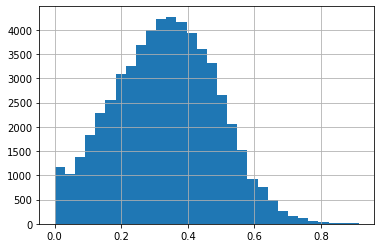

In [25]:
df_players_rating.rating.hist(bins=30)

### Задание 3

Качество рейтинг-системы оценивается качеством предсказаний результатов
турниров. Но сами повопросные результаты наши модели предсказывать вряд ли
смогут, ведь неизвестно, насколько сложными окажутся вопросы в будущих
турнирах; да и не нужны эти предсказания сами по себе. Поэтому:
* предложите способ предсказать результаты нового турнира с известными
составами, но неизвестными вопросами, в виде ранжирования команд;
* в качестве метрики качества на тестовом наборе давайте считать ранговые
корреляции Спирмена и Кендалла (их можно взять в пакете scipy) между
реальным ранжированием в результатах турнира и предсказанным
моделью, усреднённые по тестовому множеству турниров.

Для самопроверки: у меня средняя корреляция Спирмена на тестовом множестве 2020 года во
всех моделях, включая baselines, получалась порядка 0.7-0.8, а корреляция Кендалла — порядка
0.5-0.6. Если у вас корреляции вышли за 0.9 или, наоборот, упали ниже 0.3, скорее всего где-то баг.

Имея рейтинг игроков (вероятность ответить на произвольный вопрос), посчитаем рейтинг команды
как вероятность ответить хотя бы одному ее участнику на вопрос:
$$P(T) = 1 - \prod_{x \in T}(1 - P(x)).$$

In [26]:
def get_teams_predicted_rating(result, df_players_rating):
    ratings = []
    for team in result:
        team_rating = 1
        for player in team['teamMembers']:
            try:
                team_rating *= 1 - df_players_rating.rating[player['player']['id']]
            except KeyError:
                pass
        team_rating = 1 - team_rating
        ratings.append((team_rating, int(team['position'])))
    ratings.sort()
    return np.array(list(zip(*ratings))[1])

In [27]:
from scipy import stats as sts

def calc_metrics(results, df_players_rating):
    spearmanr_coef = 0
    kendalltau_coef = 0
    num = 0
    for result in results.values():
        preds = get_teams_predicted_rating(result, df_players_rating)
        real = np.arange(1, len(result) + 1)
        cur_spearman = sts.spearmanr(preds, -real)[0]
        cur_kendalltau = sts.kendalltau(preds, -real)[0]
        if not np.isnan(cur_spearman) and not np.isnan(cur_kendalltau):
            spearmanr_coef += cur_spearman
            kendalltau_coef += cur_kendalltau
            num += 1
        
    spearmanr_coef /= num
    kendalltau_coef /= num
    return spearmanr_coef, kendalltau_coef

In [28]:
calc_metrics(results_test, df_players_rating)

(0.7001036225845343, 0.5395515761077764)

### Задание 4

Теперь главное: ЧГК — это всё-таки командная игра. Поэтому:
* предложите способ учитывать то, что на вопрос отвечают сразу несколько
игроков; скорее всего, понадобятся скрытые переменные; не стесняйтесь
делать упрощающие предположения, но теперь переменные “игрок X
ответил на вопрос Y” при условии данных должны стать зависимыми для
игроков одной и той же команды;
* разработайте EM-схему для обучения этой модели, реализуйте её в коде;
* обучите несколько итераций, убедитесь, что целевые метрики со временем
растут (скорее всего, ненамного, но расти должны), выберите лучшую
модель, используя целевые метрики.


Пусть $Z_{q, t}$ $-$ скрытая переменная, вектор из 0 и 1, который показывает, кто из игроков команды $t$
смог ответить на вопрос $q$, а $Z_{q, t, p}$ $-$ смог ли игрок $p$ из команды $t$ ответить на вопрос $q$. Тогда правдоподобие:

$$P(D, Z | \theta) = \prod_{R \in Results} \prod_{q \in R_Q} \prod_{t \in R_{teams}} \prod_{p \in t_{players}}
P(p | q, \theta)^{Z_{q, t, p}} \cdot (1 - P(p | q, \theta))^{(1 - Z_{q, t, p})}
$$
$$ln P(D, Z| \theta) = \sum_{R \in Results} \sum_{q \in R_Q} \sum_{t \in R_{teams}} \sum_{p \in t_{players}}
Z_{q, t, p} \cdot ln P(p | q, \theta) + (1 - Z_{q, t, p}) \cdot ln(1 - P(p | q, \theta))
$$

**EM-схема:**

На E-шаге вычислим матожидание $\mathbb{E}[Z_{q, t, p}]$:

$$
\begin{align*}
   \mathbb{E}[Z_{q, t, p}] =
   \begin{cases}
    0 &, \quad \text{if } t[q] = 0
    \text{ (команда $t$ не ответила на вопрос $q$)}\\
    \frac{P(p|q, \theta)}{P(t|q)} =
    \frac{P(p | q, \theta)}{1 - \prod_{p' \in t}(1 - P(p'|q, \theta))}  &, \quad \text{if } t[q] = 1
    \text{ (команда $t$ ответила на вопрос $q$)}
   \end{cases}
\end{align*}
$$

На M-шаге будем максимизировать матожидание правдоподобия по $\theta$:

$$\mathbb{E}_Z [ln P(D, Z | \theta)] = \sum_{R \in Results} \sum_{q \in R_Q} \sum_{t \in R_{teams}} \sum_{p \in t_{players}}
\mathbb{E}[Z_{q, t, p}] \cdot ln P(p | q, \theta) + (1 - \mathbb{E}[Z_{q, t, p}]) \cdot ln(1 - P(p | q, \theta))
$$

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
players_questions_em = players_questions_train
players_questions_em['team_answer'] = players_questions_em.answer
players_questions_em['preds'] = 0
players_questions_em

,question_id,team_id,player_id,question_rating,answer,team_answer,preds
0,4772000,47720045556,6212,0.883117,1,1,0
1,4772000,47720045556,18332,0.883117,1,1,0
2,4772000,47720045556,18036,0.883117,1,1,0
3,4772000,47720045556,22799,0.883117,1,1,0
4,4772000,47720045556,15456,0.883117,1,1,0
...,...,...,...,...,...,...,...
16215174,6191035,61910076301,217855,0.227273,0,0,0
16215175,6191035,61910076301,217856,0.227273,0,0,0
16215176,6191035,61910076301,217857,0.227273,0,0,0
16215177,6191035,61910076301,217858,0.227273,0,0,0


In [31]:
players_questions_em = np.array(players_questions_em)

Т. к. логистическая регрессия принимает только метки классов, реализуем оболочку над ней, передавая вероятности как веса примеров.

In [32]:
class ProbLogisticRegression(LogisticRegression):
    def fit(self, X, y):
        X = np.array(X).reshape(-1, 1)
        X = np.vstack([X, X])
        sz = y.shape[0]
        y_new = np.hstack([np.ones(sz), np.zeros(sz)])
        weights = np.hstack([y, 1 - y])
        return super().fit(X, y_new, weights)

In [33]:
def init_models(Z):
    models = {}
    for player_id in np.unique(Z[:, 2]):
        models[player_id] = ProbLogisticRegression(solver='sag')
    return models

In [34]:
def make_preds(Z, models):
    for i in range(Z.shape[0]):
        if Z[i, 5] == 1:
            X = Z[i, 3].reshape(-1, 1)
            Z[i, 6] = models[Z[i, 2]].predict_proba(X)[0][1]
            if np.isnan(Z[i, 6]):
                Z[i, 6] = 0

In [35]:
def e_step(Z, models):
    Z[:, 4] = Z[:, 6]
    i = 0
    while i < Z.shape[0]:
        team_id = Z[i, 1]
        
        prod = 1
        j = i
        while j < Z.shape[0] and team_id == Z[j, 1]:
            prod *= 1 - Z[j, 4]
            j += 1
        prod = 1 - prod
        
        while i < j:
            if prod == 0:
                Z[i, 4] = 0
            else:
                Z[i, 4] /= prod
            i += 1
    
    i = 0
    while i < Z.shape[0]:
        q_id = Z[i, 0]
        rating = 0
        j = i
        while j < Z.shape[0] and q_id == Z[j, 0]:
            rating += Z[j, 4]
            j += 1
        
        rating /= j - i
        
        while i < j:
            Z[i, 4] = rating
            i += 1
    
    print('e_step done')

In [36]:
def m_step(Z, models):
    for player_id in np.unique(Z[:, 2]):
        cur_player = Z[Z[:, 2] == player_id]
        models[player_id].fit(cur_player[:, 3], cur_player[:, 4])
    
    print('m_step done')

In [37]:
def get_questions_rating(players_questions_em):
    questions_rating = []
    questions = set(players_questions_em[:, 0])
    i = 0
    while i < players_questions_em.shape[0] and questions:
        if players_questions_em[i, 0] in questions:
            questions.remove(players_questions_em[i, 0])
            questions_rating.append(players_questions_em[i, 3])
        i += 1

    return np.array(questions_rating)

In [38]:
def get_players_rating(players_questions_em, models):
    players_rating = {
        'player_id': [],
        'rating': [],
    }
    Q = QDistr(get_questions_rating(players_questions_em), 60)
    for player_id, model in models.items():
        players_rating['rating'].append(get_player_rating(Q, model))
        players_rating['player_id'].append(player_id)
    
    return pd.DataFrame(players_rating['rating'], columns=['rating'], index=players_rating['player_id'])

In [39]:
models = init_models(players_questions_em)
m_step(players_questions_em, models)
make_preds(players_questions_em, models)

m_step done


In [40]:
m = calc_metrics(results_test, get_players_rating(players_questions_em, models))
print(f'metrics: {m}')

metrics: (0.700266364197413, 0.5394890472908767)


In [41]:
for i in range(4):
    print(f'step {i + 1}:')
    e_step(players_questions_em, models)
    m_step(players_questions_em, models)
    make_preds(players_questions_em, models)
    m = calc_metrics(results_test, get_players_rating(players_questions_em, models))
    print(f'metrics: {m}')

step 1:
e_step done
m_step done
metrics: (0.7255283892093601, 0.563627194151096)
step 2:
e_step done
m_step done
metrics: (0.7429435898056139, 0.5813038053827665)


### Задание 5

А что там с вопросами? Постройте “рейтинг-лист” турниров по сложности вопросов.
Соответствует ли он интуиции (например, на чемпионате мира в целом должны
быть сложные вопросы, а на турнирах для школьников — простые)? Если будет
интересно: постройте топ сложных и простых вопросов со ссылками на конкретные
записи в базе вопросов ЧГК (это чисто техническое дело, тут никакого ML нету).


In [42]:
def get_questions_rating(players_questions_em):
    questions_rating = {
        'question_id': [],
        'rating': [],
    }
    questions = set(players_questions_em[:, 0])
    i = 0
    while i < players_questions_em.shape[0] and questions:
        if players_questions_em[i, 0] in questions:
            questions.remove(players_questions_em[i, 0])
            questions_rating['question_id'].append(players_questions_em[i, 0])
            questions_rating['rating'].append(players_questions_em[i, 3])
        i += 1

    return pd.DataFrame.from_dict(questions_rating)

In [43]:
questions_rating = get_questions_rating(players_questions_em)

In [44]:
questions_rating

,question_id,rating
0,4772000.0,0.883117
1,4772001.0,0.779221
2,4772002.0,0.445887
3,4772003.0,0.519481
4,4772004.0,0.878788
...,...,...
30711,6191031.0,0.000000
30712,6191032.0,0.136364
30713,6191033.0,0.818182
30714,6191034.0,0.136364


In [45]:
def get_tournaments_rating(tournaments, questions_rating):
    rating = {
        'tournament_name': [],
        'rating': [],
    }
    
    for t_id, tournament in tournaments.items():
        data = questions_rating[(questions_rating.question_id >= t_id * 1000) & (questions_rating.question_id < (t_id + 1) * 1000)]
        rating['tournament_name'].append(tournament['name'])
        rating['rating'].append(data.rating.sum())
                
    return pd.DataFrame.from_dict(rating)

In [46]:
tournaments_rating = get_tournaments_rating(tournaments_train, questions_rating)
tournaments_rating = tournaments_rating.sort_values(by='rating', ascending=False)
tournaments_rating.head(10)

,tournament_name,rating
460,Шестой киевский марафон. Асинхрон,314.750000
122,Кавалькада волхвов,165.200000
381,Высшая лига ЧТ,92.000000
653,Чемпионат Санкт-Петербурга. Высшая лига,80.000000
284,Студенческая лига ЧТ,65.473684
345,Первая лига ЧТ,64.000000
465,Memel Cup,52.577778
77,Славянка,50.576923
48,Игра Первопрестольной. Четвёртый сезон,44.560000
58,Холодная голова,41.966667


In [47]:
tournaments_rating.tail(10)

,tournament_name,rating
656,Студенческий чемпионат Тюменской области,7.956522
279,Записки охотника,7.898551
545,Чемпионат Мира. Этап 2 Группа С,7.793103
640,Открытый кубок МВУТ,7.478261
324,Чемпионат Кыргызстана,7.250000
172,Чемпионат школы №1568,6.947368
364,Синхрон высшей лиги Москвы,6.600000
588,Memento memes IV,6.573333
382,Чемпионат Таджикистана,4.076923
652,Чемпионат Санкт-Петербурга. Первая лига,0.000000


В целом, рейтинг-лист турниров соответствует интуиции.